# Setup

In [1]:
import bizwiz

path_manager = bizwiz.PathManager(
    data_dir = "../data/comtrade/"
)

# Find Countries

In [2]:
from bizwiz.trade import search_codes
countries = [
    'sweden',
    'canada',
    'united states',
    'china',
    'india',
    'germany',
    'france',
    'britain',
    'turkiye',
    'arabia',
    'norway',
    'netherlands',
    'russia',
    'mexico',
    'argentina',
    'australia',
    'thailand',    
]

country_search = search_codes.get_country_codes(keywords=countries, filepath='../data/comtrade/iso_country_codes.csv')
display(country_search)

,name,iso,comtrade_query,keyword
0,Sweden,SWE,752,sweden
1,Canada,CAN,124,canada
2,United States of America,USA,"840,842,841",united states
3,China,CHN,156,china
4,India,IND,"699,356",india
5,Germany,DEU,"280,276",germany
6,France,FRA,"251,250",france
7,United Kingdom of Great Britain and Northern I...,GBR,826,britain
8,Türkiye,TUR,792,turkiye
9,Saudi Arabia,SAU,682,arabia


# Find HS Code

In [3]:
from bizwiz.trade import search_codes
chemicals = [
    'caustic',
    'h2so4',
    'na2so4',
    'potassium sulphate',
    'potassium chloride',
]

hs_search = search_codes.get_hs_codes(keywords=chemicals)
display(hs_search)
display(hs_search['id'].tolist())

,id,score,text,rank,reasoning,chemical_name,keyword
0,281511,90,281511 - Sodium hydroxide (caustic soda); solid,1,Sodium hydroxide is commonly referred to as ca...,sodium_hydroxide,caustic
1,2807,95,Sulfuric acid,1,Sulfuric acid (H2SO4) is a widely used chemica...,sulfuric_acid,h2so4
2,2833,95,Sodium Sulfate,1,Sodium sulfate (Na2SO4) directly matches the s...,sodium sulfate,na2so4
3,310430,90,"310430 - Fertilizers, mineral or chemical; pot...",1,This HS Code directly refers to potassium sulp...,potassium sulphate,potassium sulphate
4,310420,90,"310420 - Fertilizers, mineral or chemical; pot...",1,This HS code is directly related to potassium ...,potassium chloride,potassium chloride


['281511', '2807', '2833', '310430', '310420']

# Manual Loop

In [50]:
from bizwiz.trade import search_data
api_key = "b1a3f42948df4538a17418bdfdc5574a"

import pandas as pd
import datetime
from bizwiz import trade_data

def combine_import_export_data(data):
    if data['export'].shape[0]==0:
        combined_df = data['import'].copy()
        combined_df['hs_code'] = data['hs_code']
    elif  data['import'].shape[0] ==0:
        combined_df = data['export'].copy()
        combined_df['hs_code'] = data['hs_code']
    else:
        #combine
        combined_df = pd.concat([
            data['import'],
            data['export'],
        ])
        combined_df['hs_code'] = data['hs_code']
    return combined_df

def export_raw_dataset(dataset, year, iso_country, export_dir, printer=None):
    """dump raw CSV file for later
    """
    if printer is None:
        def printer(msg):
            return None 
    
    import warnings
    # Suppress the specific FutureWarning
    warnings.filterwarnings("ignore", category=FutureWarning, message="The behavior of DataFrame concatenation with empty or all-NA entries is deprecated.")
    
    
    # - make a country folder
    year_dir = export_dir / f"{year}"
    country_dir = year_dir / iso_country
    country_dir.mkdir(parents=True, exist_ok=True)
    printer(f"- export path: '{country_dir.resolve()}'")
    
    date_prefix = datetime.datetime.today().strftime(format="%Y%m%d") #e.g. 20240924
    for data in dataset: 
        hs_code_prefix = f"hs{data['hs_code']}"
        printer(f"- exporting raw data for '{data['hs_code']}'")
        filepath = country_dir / f"{date_prefix}_{hs_code_prefix}_import.csv"
        data['import'].to_csv(filepath, index=False)
        printer(f"-- import data [{data['import'].shape}]: '{filepath.resolve()}'")
        filepath = country_dir / f"{date_prefix}_{hs_code_prefix}_export.csv"
        data['export'].to_csv(filepath, index=False)
        printer(f"-- export data [{data['export'].shape}]: '{filepath.resolve()}'")
        filepath = country_dir / f"{date_prefix}_{hs_code_prefix}_combined.csv"
        combined_df = combine_import_export_data(data)
        combined_df.to_csv(filepath, index=False)
        printer(f"-- combined data [{combined_df.shape}]: '{filepath.resolve()}'")
    return True

In [51]:
##### Inputs #####
export_dirname = "20240924_export"
country_search_filename = "country_search.csv"
hs_code_search_filename = "hs_code_search.csv"

##### Calculation #####
#- setup export location
export_dir = path_manager.data_dir / export_dirname
#create it
export_dir.mkdir(parents=True, exist_ok=True)
print(f"Export path: '{export_dir.resolve()}'")

#- store/load the search tables
if country_search_filename is None:
    #store
    country_df = country_search.copy()
    filepath = export_dir / "country_search.csv"
    country_df.to_csv(filepath, index=False)
    print(f"-- writing country_search: '{filepath.resolve()}'")
else:
    #load
    filepath = export_dir / country_search_filename
    country_df = pd.read_csv(filepath)
    print(f"-- loading country_search: '{filepath.resolve()}'")
if hs_code_search_filename is None:
    #store
    hs_code_df = hs_search.copy()
    filepath = export_dir / "hs_code_search.csv"
    hs_code_df.to_csv(filepath, index=False)
    print(f"-- writing hs_code_search: '{filepath.resolve()}'")
else:
    #load
    filepath = export_dir / hs_code_search_filename
    hs_code_df = pd.read_csv(filepath)
    print(f"-- loading hs_code_search: '{filepath.resolve()}'")

#- show retrieval stats
countries = country_df['iso'].tolist()
hs_codes = hs_code_df['id'].tolist()

print(f"Total Datasets: {len(countries)*len(hs_codes)}")
print(f"{countries=}")
print(f"- n={len(countries)}")
print(f"{hs_codes=}")
print(f"- n={len(hs_codes)}")

Cost Year: 2024
Export path: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export'
-- loading country_search: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/country_search.csv'
-- loading hs_code_search: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/hs_code_search.csv'
Total Datasets: 85
countries=['SWE', 'CAN', 'USA', 'CHN', 'IND', 'DEU', 'FRA', 'GBR', 'TUR', 'SAU', 'NOR', 'NLD', 'RUS', 'MEX', 'ARG', 'AUS', 'THA']
- n=17
hs_codes=[281511, 2807, 2833, 310430, 310420]
- n=5


## Grab country data 2024

In [ ]:
year = 2024
print(f"Cost Year: {year}")

In [52]:
country_i = 0
iso_country = countries[country_i]
print(f"{iso_country=}")
print(f"{hs_codes=}")
print(f"- grabbing data...")
dataset = search_data.get_trade_data(
    api_key=api_key,
    hs_codes=hs_codes,
    country_code = iso_country,
    year = year,
    printer=print,
)
print(f"- successfully grabbed data")
print(f"- exporting data")
did_export = export_raw_dataset(dataset, year, iso_country, export_dir, printer=print)
print(f"- successfully exported data")

iso_country='SWE'
hs_codes=[281511, 2807, 2833, 310430, 310420]
- grabbing data...
-- checking available data
-- data available, grabbing trade data
-- grabbing data for hs_code: 281511
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 2807
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 2833
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 310430
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 310420
-- grabbing import data
-- grabbing export data
- successfully grabbed data
- exporting data
- export path: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2024/SWE'
- exporting raw data for '281511'
-- import data [(67, 56)]: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2024/SWE/20240924_hs281511_import.csv'
-- export data [(0, 57)]: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2024/SWE/20240924_hs281511_exp

In [53]:
country_i = 1
iso_country = countries[country_i]
print(f"{iso_country=}")
print(f"{hs_codes=}")
print(f"- grabbing data...")
dataset = search_data.get_trade_data(
    api_key=api_key,
    hs_codes=hs_codes,
    country_code = iso_country,
    year = year,
    printer=print,
)
print(f"- successfully grabbed data")
print(f"- exporting data")
did_export = export_raw_dataset(dataset, year, iso_country, export_dir, printer=print)
print(f"- successfully exported data")

iso_country='CAN'
hs_codes=[281511, 2807, 2833, 310430, 310420]
- grabbing data...
-- checking available data
-- data available, grabbing trade data
-- grabbing data for hs_code: 281511
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 2807
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 2833
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 310430
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 310420
-- grabbing import data
-- grabbing export data
- successfully grabbed data
- exporting data
- export path: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2024/CAN'
- exporting raw data for '281511'
-- import data [(93, 56)]: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2024/CAN/20240924_hs281511_import.csv'
-- export data [(7, 56)]: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2024/CAN/20240924_hs281511_exp

In [54]:
country_i = 2
iso_country = countries[country_i]
print(f"{iso_country=}")
print(f"{hs_codes=}")
print(f"- grabbing data...")
dataset = search_data.get_trade_data(
    api_key=api_key,
    hs_codes=hs_codes,
    country_code = iso_country,
    year = year,
    printer=print,
)
print(f"- successfully grabbed data")
print(f"- exporting data")
did_export = export_raw_dataset(dataset, year, iso_country, export_dir, printer=print)
print(f"- successfully exported data")

iso_country='USA'
hs_codes=[281511, 2807, 2833, 310430, 310420]
- grabbing data...
-- checking available data
-- data available, grabbing trade data
-- grabbing data for hs_code: 281511
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 2807
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 2833
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 310430
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 310420
-- grabbing import data
-- grabbing export data
- successfully grabbed data
- exporting data
- export path: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2024/USA'
- exporting raw data for '281511'
-- import data [(73, 56)]: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2024/USA/20240924_hs281511_import.csv'
-- export data [(130, 56)]: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2024/USA/20240924_hs281511_e

In [55]:
country_i = 3
iso_country = countries[country_i]
print(f"{iso_country=}")
print(f"{hs_codes=}")
print(f"- grabbing data...")
dataset = search_data.get_trade_data(
    api_key=api_key,
    hs_codes=hs_codes,
    country_code = iso_country,
    year = year,
    printer=print,
)
print(f"- successfully grabbed data")
print(f"- exporting data")
did_export = export_raw_dataset(dataset, year, iso_country, export_dir, printer=print)
print(f"- successfully exported data")

iso_country='CHN'
hs_codes=[281511, 2807, 2833, 310430, 310420]
- grabbing data...
-- checking available data
-- data available, grabbing trade data
-- grabbing data for hs_code: 281511
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 2807
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 2833
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 310430
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 310420
-- grabbing import data
-- grabbing export data
- successfully grabbed data
- exporting data
- export path: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2024/CHN'
- exporting raw data for '281511'
-- import data [(0, 57)]: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2024/CHN/20240924_hs281511_import.csv'
-- export data [(0, 57)]: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2024/CHN/20240924_hs281511_expo

In [56]:
country_i = 4
iso_country = countries[country_i]
print(f"{iso_country=}")
print(f"{hs_codes=}")
print(f"- grabbing data...")
dataset = search_data.get_trade_data(
    api_key=api_key,
    hs_codes=hs_codes,
    country_code = iso_country,
    year = year,
    printer=print,
)
print(f"- successfully grabbed data")
print(f"- exporting data")
did_export = export_raw_dataset(dataset, year, iso_country, export_dir, printer=print)
print(f"- successfully exported data")

iso_country='IND'
hs_codes=[281511, 2807, 2833, 310430, 310420]
- grabbing data...
-- checking available data
-- data available, grabbing trade data
-- grabbing data for hs_code: 281511
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 2807
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 2833
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 310430
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 310420
-- grabbing import data
-- grabbing export data
- successfully grabbed data
- exporting data
- export path: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2024/IND'
- exporting raw data for '281511'
-- import data [(50, 56)]: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2024/IND/20240924_hs281511_import.csv'
-- export data [(344, 56)]: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2024/IND/20240924_hs281511_e

In [57]:
country_i = 5
iso_country = countries[country_i]
print(f"{iso_country=}")
print(f"{hs_codes=}")
print(f"- grabbing data...")
dataset = search_data.get_trade_data(
    api_key=api_key,
    hs_codes=hs_codes,
    country_code = iso_country,
    year = year,
    printer=print,
)
print(f"- successfully grabbed data")
print(f"- exporting data")
did_export = export_raw_dataset(dataset, year, iso_country, export_dir, printer=print)
print(f"- successfully exported data")

iso_country='DEU'
hs_codes=[281511, 2807, 2833, 310430, 310420]
- grabbing data...
-- checking available data
-- data available, grabbing trade data
-- grabbing data for hs_code: 281511
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 2807
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 2833
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 310430
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 310420
-- grabbing import data
-- grabbing export data
- successfully grabbed data
- exporting data
- export path: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2024/DEU'
- exporting raw data for '281511'
-- import data [(91, 56)]: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2024/DEU/20240924_hs281511_import.csv'
-- export data [(0, 57)]: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2024/DEU/20240924_hs281511_exp

In [58]:
country_i = 6
iso_country = countries[country_i]
print(f"{iso_country=}")
print(f"{hs_codes=}")
print(f"- grabbing data...")
dataset = search_data.get_trade_data(
    api_key=api_key,
    hs_codes=hs_codes,
    country_code = iso_country,
    year = year,
    printer=print,
)
print(f"- successfully grabbed data")
print(f"- exporting data")
did_export = export_raw_dataset(dataset, year, iso_country, export_dir, printer=print)
print(f"- successfully exported data")

iso_country='FRA'
hs_codes=[281511, 2807, 2833, 310430, 310420]
- grabbing data...
-- checking available data
-- data available, grabbing trade data
-- grabbing data for hs_code: 281511
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 2807
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 2833
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 310430
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 310420
-- grabbing import data
-- grabbing export data
- successfully grabbed data
- exporting data
- export path: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2024/FRA'
- exporting raw data for '281511'
-- import data [(27, 56)]: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2024/FRA/20240924_hs281511_import.csv'
-- export data [(66, 56)]: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2024/FRA/20240924_hs281511_ex

In [59]:
country_i = 7
iso_country = countries[country_i]
print(f"{iso_country=}")
print(f"{hs_codes=}")
print(f"- grabbing data...")
dataset = search_data.get_trade_data(
    api_key=api_key,
    hs_codes=hs_codes,
    country_code = iso_country,
    year = year,
    printer=print,
)
print(f"- successfully grabbed data")
print(f"- exporting data")
did_export = export_raw_dataset(dataset, year, iso_country, export_dir, printer=print)
print(f"- successfully exported data")

iso_country='GBR'
hs_codes=[281511, 2807, 2833, 310430, 310420]
- grabbing data...
-- checking available data
-- data available, grabbing trade data
-- grabbing data for hs_code: 281511
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 2807
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 2833
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 310430
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 310420
-- grabbing import data
-- grabbing export data
- successfully grabbed data
- exporting data
- export path: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2024/GBR'
- exporting raw data for '281511'
-- import data [(72, 56)]: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2024/GBR/20240924_hs281511_import.csv'
-- export data [(0, 57)]: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2024/GBR/20240924_hs281511_exp

In [60]:
country_i = 8
iso_country = countries[country_i]
print(f"{iso_country=}")
print(f"{hs_codes=}")
print(f"- grabbing data...")
dataset = search_data.get_trade_data(
    api_key=api_key,
    hs_codes=hs_codes,
    country_code = iso_country,
    year = year,
    printer=print,
)
print(f"- successfully grabbed data")
print(f"- exporting data")
did_export = export_raw_dataset(dataset, year, iso_country, export_dir, printer=print)
print(f"- successfully exported data")

iso_country='TUR'
hs_codes=[281511, 2807, 2833, 310430, 310420]
- grabbing data...
-- checking available data
-- data available, grabbing trade data
-- grabbing data for hs_code: 281511
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 2807
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 2833
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 310430
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 310420
-- grabbing import data
-- grabbing export data
- successfully grabbed data
- exporting data
- export path: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2024/TUR'
- exporting raw data for '281511'
-- import data [(89, 56)]: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2024/TUR/20240924_hs281511_import.csv'
-- export data [(164, 56)]: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2024/TUR/20240924_hs281511_e

In [62]:
country_i = 9
iso_country = countries[country_i]
print(f"{iso_country=}")
print(f"{hs_codes=}")
print(f"- grabbing data...")
dataset = search_data.get_trade_data(
    api_key=api_key,
    hs_codes=hs_codes,
    country_code = iso_country,
    year = year,
    printer=print,
)
print(f"- successfully grabbed data")
print(f"- exporting data")
did_export = export_raw_dataset(dataset, year, iso_country, export_dir, printer=print)
print(f"- successfully exported data")

iso_country='SAU'
hs_codes=[281511, 2807, 2833, 310430, 310420]
- grabbing data...
-- checking available data
-- data available, grabbing trade data
-- grabbing data for hs_code: 281511
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 2807
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 2833
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 310430
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 310420
-- grabbing import data
-- grabbing export data
- successfully grabbed data
- exporting data
- export path: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2024/SAU'
- exporting raw data for '281511'
-- import data [(0, 57)]: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2024/SAU/20240924_hs281511_import.csv'
-- export data [(0, 57)]: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2024/SAU/20240924_hs281511_expo

## Grab country data 2023

In [63]:
year = 2023
print(f"Cost Year: {year}")

Cost Year: 2023


In [65]:
country_i = 0
iso_country = countries[country_i]
print(f"{iso_country=}")
print(f"{hs_codes=}")
print(f"- grabbing data...")
dataset = search_data.get_trade_data(
    api_key=api_key,
    hs_codes=hs_codes,
    country_code = iso_country,
    year = year,
    printer=print,
)
print(f"- successfully grabbed data")
print(f"- exporting data")
did_export = export_raw_dataset(dataset, year, iso_country, export_dir, printer=print)
print(f"- successfully exported data")

iso_country='SWE'
hs_codes=[281511, 2807, 2833, 310430, 310420]
- grabbing data...
-- checking available data
-- data available, grabbing trade data
-- grabbing data for hs_code: 281511
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 2807
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 2833
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 310430
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 310420
-- grabbing import data
-- grabbing export data
- successfully grabbed data
- exporting data
- export path: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2023/SWE'
- exporting raw data for '281511'
-- import data [(127, 56)]: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2023/SWE/20240924_hs281511_import.csv'
-- export data [(0, 57)]: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2023/SWE/20240924_hs281511_ex

In [64]:
country_i = 1
iso_country = countries[country_i]
print(f"{iso_country=}")
print(f"{hs_codes=}")
print(f"- grabbing data...")
dataset = search_data.get_trade_data(
    api_key=api_key,
    hs_codes=hs_codes,
    country_code = iso_country,
    year = year,
    printer=print,
)
print(f"- successfully grabbed data")
print(f"- exporting data")
did_export = export_raw_dataset(dataset, year, iso_country, export_dir, printer=print)
print(f"- successfully exported data")

iso_country='CAN'
hs_codes=[281511, 2807, 2833, 310430, 310420]
- grabbing data...
-- checking available data
-- data available, grabbing trade data
-- grabbing data for hs_code: 281511
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 2807
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 2833
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 310430
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 310420
-- grabbing import data
-- grabbing export data
- successfully grabbed data
- exporting data
- export path: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2023/CAN'
- exporting raw data for '281511'
-- import data [(136, 56)]: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2023/CAN/20240924_hs281511_import.csv'
-- export data [(12, 56)]: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2023/CAN/20240924_hs281511_e

In [66]:
country_i = 2
iso_country = countries[country_i]
print(f"{iso_country=}")
print(f"{hs_codes=}")
print(f"- grabbing data...")
dataset = search_data.get_trade_data(
    api_key=api_key,
    hs_codes=hs_codes,
    country_code = iso_country,
    year = year,
    printer=print,
)
print(f"- successfully grabbed data")
print(f"- exporting data")
did_export = export_raw_dataset(dataset, year, iso_country, export_dir, printer=print)
print(f"- successfully exported data")

iso_country='USA'
hs_codes=[281511, 2807, 2833, 310430, 310420]
- grabbing data...
-- checking available data
-- data available, grabbing trade data
-- grabbing data for hs_code: 281511
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 2807
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 2833
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 310430
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 310420
-- grabbing import data
-- grabbing export data
- successfully grabbed data
- exporting data
- export path: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2023/USA'
- exporting raw data for '281511'
-- import data [(132, 56)]: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2023/USA/20240924_hs281511_import.csv'
-- export data [(251, 56)]: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2023/USA/20240924_hs281511_

In [67]:
country_i = 3
iso_country = countries[country_i]
print(f"{iso_country=}")
print(f"{hs_codes=}")
print(f"- grabbing data...")
dataset = search_data.get_trade_data(
    api_key=api_key,
    hs_codes=hs_codes,
    country_code = iso_country,
    year = year,
    printer=print,
)
print(f"- successfully grabbed data")
print(f"- exporting data")
did_export = export_raw_dataset(dataset, year, iso_country, export_dir, printer=print)
print(f"- successfully exported data")

iso_country='CHN'
hs_codes=[281511, 2807, 2833, 310430, 310420]
- grabbing data...
-- checking available data
-- data available, grabbing trade data
-- grabbing data for hs_code: 281511
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 2807
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 2833
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 310430
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 310420
-- grabbing import data
-- grabbing export data
- successfully grabbed data
- exporting data
- export path: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2023/CHN'
- exporting raw data for '281511'
-- import data [(114, 56)]: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2023/CHN/20240924_hs281511_import.csv'
-- export data [(995, 56)]: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2023/CHN/20240924_hs281511_

In [68]:
country_i = 4
iso_country = countries[country_i]
print(f"{iso_country=}")
print(f"{hs_codes=}")
print(f"- grabbing data...")
dataset = search_data.get_trade_data(
    api_key=api_key,
    hs_codes=hs_codes,
    country_code = iso_country,
    year = year,
    printer=print,
)
print(f"- successfully grabbed data")
print(f"- exporting data")
did_export = export_raw_dataset(dataset, year, iso_country, export_dir, printer=print)
print(f"- successfully exported data")

iso_country='IND'
hs_codes=[281511, 2807, 2833, 310430, 310420]
- grabbing data...
-- checking available data
-- data available, grabbing trade data
-- grabbing data for hs_code: 281511
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 2807
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 2833
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 310430
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 310420
-- grabbing import data
-- grabbing export data
- successfully grabbed data
- exporting data
- export path: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2023/IND'
- exporting raw data for '281511'
-- import data [(94, 56)]: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2023/IND/20240924_hs281511_import.csv'
-- export data [(737, 56)]: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2023/IND/20240924_hs281511_e

In [69]:
country_i = 5
iso_country = countries[country_i]
print(f"{iso_country=}")
print(f"{hs_codes=}")
print(f"- grabbing data...")
dataset = search_data.get_trade_data(
    api_key=api_key,
    hs_codes=hs_codes,
    country_code = iso_country,
    year = year,
    printer=print,
)
print(f"- successfully grabbed data")
print(f"- exporting data")
did_export = export_raw_dataset(dataset, year, iso_country, export_dir, printer=print)
print(f"- successfully exported data")

iso_country='DEU'
hs_codes=[281511, 2807, 2833, 310430, 310420]
- grabbing data...
-- checking available data
-- data available, grabbing trade data
-- grabbing data for hs_code: 281511
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 2807
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 2833
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 310430
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 310420
-- grabbing import data
-- grabbing export data
- successfully grabbed data
- exporting data
- export path: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2023/DEU'
- exporting raw data for '281511'
-- import data [(212, 56)]: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2023/DEU/20240924_hs281511_import.csv'
-- export data [(0, 57)]: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2023/DEU/20240924_hs281511_ex

In [70]:
country_i = 6
iso_country = countries[country_i]
print(f"{iso_country=}")
print(f"{hs_codes=}")
print(f"- grabbing data...")
dataset = search_data.get_trade_data(
    api_key=api_key,
    hs_codes=hs_codes,
    country_code = iso_country,
    year = year,
    printer=print,
)
print(f"- successfully grabbed data")
print(f"- exporting data")
did_export = export_raw_dataset(dataset, year, iso_country, export_dir, printer=print)
print(f"- successfully exported data")

iso_country='FRA'
hs_codes=[281511, 2807, 2833, 310430, 310420]
- grabbing data...
-- checking available data
-- data available, grabbing trade data
-- grabbing data for hs_code: 281511
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 2807
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 2833
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 310430
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 310420
-- grabbing import data
-- grabbing export data
- successfully grabbed data
- exporting data
- export path: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2023/FRA'
- exporting raw data for '281511'
-- import data [(170, 56)]: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2023/FRA/20240924_hs281511_import.csv'
-- export data [(366, 56)]: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2023/FRA/20240924_hs281511_

In [71]:
country_i = 7
iso_country = countries[country_i]
print(f"{iso_country=}")
print(f"{hs_codes=}")
print(f"- grabbing data...")
dataset = search_data.get_trade_data(
    api_key=api_key,
    hs_codes=hs_codes,
    country_code = iso_country,
    year = year,
    printer=print,
)
print(f"- successfully grabbed data")
print(f"- exporting data")
did_export = export_raw_dataset(dataset, year, iso_country, export_dir, printer=print)
print(f"- successfully exported data")

iso_country='GBR'
hs_codes=[281511, 2807, 2833, 310430, 310420]
- grabbing data...
-- checking available data
-- data available, grabbing trade data
-- grabbing data for hs_code: 281511
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 2807
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 2833
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 310430
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 310420
-- grabbing import data
-- grabbing export data
- successfully grabbed data
- exporting data
- export path: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2023/GBR'
- exporting raw data for '281511'
-- import data [(145, 56)]: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2023/GBR/20240924_hs281511_import.csv'
-- export data [(0, 57)]: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2023/GBR/20240924_hs281511_ex

In [72]:
country_i = 8
iso_country = countries[country_i]
print(f"{iso_country=}")
print(f"{hs_codes=}")
print(f"- grabbing data...")
dataset = search_data.get_trade_data(
    api_key=api_key,
    hs_codes=hs_codes,
    country_code = iso_country,
    year = year,
    printer=print,
)
print(f"- successfully grabbed data")
print(f"- exporting data")
did_export = export_raw_dataset(dataset, year, iso_country, export_dir, printer=print)
print(f"- successfully exported data")

iso_country='TUR'
hs_codes=[281511, 2807, 2833, 310430, 310420]
- grabbing data...
-- checking available data
-- data available, grabbing trade data
-- grabbing data for hs_code: 281511
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 2807
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 2833
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 310430
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 310420
-- grabbing import data
-- grabbing export data
- successfully grabbed data
- exporting data
- export path: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2023/TUR'
- exporting raw data for '281511'
-- import data [(176, 56)]: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2023/TUR/20240924_hs281511_import.csv'
-- export data [(277, 56)]: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2023/TUR/20240924_hs281511_

In [73]:
country_i = 9
iso_country = countries[country_i]
print(f"{iso_country=}")
print(f"{hs_codes=}")
print(f"- grabbing data...")
dataset = search_data.get_trade_data(
    api_key=api_key,
    hs_codes=hs_codes,
    country_code = iso_country,
    year = year,
    printer=print,
)
print(f"- successfully grabbed data")
print(f"- exporting data")
did_export = export_raw_dataset(dataset, year, iso_country, export_dir, printer=print)
print(f"- successfully exported data")

iso_country='SAU'
hs_codes=[281511, 2807, 2833, 310430, 310420]
- grabbing data...
-- checking available data
-- data available, grabbing trade data
-- grabbing data for hs_code: 281511
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 2807
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 2833
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 310430
-- grabbing import data
-- grabbing export data
-- grabbing data for hs_code: 310420
-- grabbing import data
-- grabbing export data
- successfully grabbed data
- exporting data
- export path: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2023/SAU'
- exporting raw data for '281511'
-- import data [(0, 57)]: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2023/SAU/20240924_hs281511_import.csv'
-- export data [(0, 57)]: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2023/SAU/20240924_hs281511_expo

# Process Raw data

## Setup

In [16]:
import bizwiz

path_manager = bizwiz.PathManager(
    data_dir = "../data/comtrade/"
)

import pandas as pd

## Load Raw Data

1. load filepath
- print years
- print countries in year
- print hscodes in countries in years


2. load dataset
- load all combined datasets
- load country search
- load hs code search


In [13]:
load_dirname = "20240924_export"
load_dir = path_manager.data_dir / load_dirname
print(f"Load directory: '{load_dir.resolve()}'")

print("Files/Folders:")
for p in load_dir.iterdir():
    print(f"-- {p.resolve()}")

Load directory: '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export'
Files/Folders:
-- /home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2023
-- /home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/country_search.csv
-- /home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/.ipynb_checkpoints
-- /home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/hs_code_search.csv
-- /home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2024


In [14]:
import plotly.express as px
import pathlib
def load_country_data(dirpath):
    """Assumes dirpath has the following structure:
    - first level countries
    - second level files
    """
    dataset = []
    
    year_path = pathlib.Path(dirpath)
    countries = [p.stem for p in year_path.iterdir()]
    for country in countries:
        country_path = year_path / country
        df = load_and_clean_country_data(country_path)
        dataset.append(df)
    return pd.concat(dataset)

def load_and_clean_country_data(country_path):
    df = pd.DataFrame()
    for p in country_path.iterdir():
        if not p.suffix.lower() in ['.csv']:
            continue
        if p.stem.endswith('_combined'):
            #load it and concat
            _df = pd.read_csv(p)
            df = pd.concat([df,_df])

    #clean
    # - drop columns
    columns_to_keep = ['date','iso','partner','price','mass','value','kind','hs_code','period']
    cleaned_df = df[columns_to_keep].copy()
    cleaned_df['usd_per_tonne'] = cleaned_df['price']*1000
    cleaned_df['mass_tonne'] = cleaned_df['mass']/1000
    cleaned_df = cleaned_df.rename(columns={
        'price' : 'usd_per_kg',
    })
    
    return cleaned_df


In [75]:
trade_df = load_country_data('/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2024')
trade_df

/tmp/ipykernel_6986/2243861058.py:16: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



,date,iso,partner,usd_per_kg,mass,value,kind,hs_code,period,usd_per_tonne,mass_tonne
0,2024-01-01,IND,AUT,0.670850,20000.000,13416.998,import,2833,202401,670.849900,20.000000
1,2024-01-01,IND,BEL,4.708699,19205.000,90430.555,import,2833,202401,4708.698516,19.205000
2,2024-01-01,IND,CHN,0.340796,5309308.000,1809389.897,import,2833,202401,340.795806,5309.308000
3,2024-01-01,IND,DEU,1.742289,100054.000,174323.016,import,2833,202401,1742.289324,100.054000
4,2024-01-01,IND,IRL,152.320535,1962.449,298921.282,import,2833,202401,152320.535209,1.962449
...,...,...,...,...,...,...,...,...,...,...,...
198,2024-06-01,USA,SGP,4.234592,1509.000,6390.000,export,281511,202406,4234.592445,1.509000
199,2024-06-01,USA,VNM,11.502513,796.000,9156.000,export,281511,202406,11502.512563,0.796000
200,2024-06-01,USA,TTO,1.939169,19102.000,37042.000,export,281511,202406,1939.168673,19.102000
201,2024-06-01,USA,TCA,22.274194,248.000,5524.000,export,281511,202406,22274.193548,0.248000


## Clean Data

3. clean up and standardize
- keep computed columns-> import/export totals, price, iso, partner, period, date?
- merge in hscode chemical name, hscode name?
- drop nas 
- remove aggregate groups (world partner)

TODO:
- plot distribution of price by partner (pair plot partner vs country)
- standardize types
- filter based on minimum size of trade? (optional)


In [76]:
from bizwiz.trade.dags import find_country_data
country_code_df = find_country_data.country_codes(filepath='../data/comtrade/iso_country_codes.csv')

def remove_unkown_partners(df:pd.DataFrame, country_df:pd.DataFrame)->pd.DataFrame:
    processed_df = pd.merge(left=df, right=country_df, left_on=['iso'], right_on=['iso'])
    processed_df = processed_df[processed_df['partner'].isin(country_df['iso'].tolist())]
    return processed_df.copy()

def is_unique_columns(df, col_name):
    """False if not unique otherwise the unique value"""
    values = df[col_name].unique().tolist()
    if len(values)>1:
        return False
    return values[0]


In [77]:
country_df = pd.read_csv('/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/country_search.csv')
hs_code_df = pd.read_csv('/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/hs_code_search.csv')

# add country names
df = pd.merge(
    left=trade_df, right=country_df[['name','iso']],
    left_on=['iso'], right_on=['iso']
)
df = df.rename(columns={'name' : 'country_name'})
# add hs code info
hs_code_df['hs_code'] = hs_code_df['id']
df = pd.merge(
    left=trade_df, right=hs_code_df[['hs_code','chemical_name','text']],
    left_on=['hs_code'], right_on=['hs_code']
)
df = df.rename(columns={'text' : 'hs_code_title'})
#reorder
ordered_columns = [
    'date','chemical_name','iso','kind','partner','usd_per_tonne','mass_tonne'
]
unordered_columns = df.columns.difference(ordered_columns).tolist()
df = df[ordered_columns+unordered_columns].copy()
df


,date,chemical_name,iso,kind,partner,usd_per_tonne,mass_tonne,hs_code,hs_code_title,mass,period,usd_per_kg,value
0,2024-01-01,sodium_sulfate,IND,import,AUT,670.849900,20.000000,2833,Sodium sulfate,20000.000,202401,0.670850,13416.998
1,2024-01-01,sodium_sulfate,IND,import,BEL,4708.698516,19.205000,2833,Sodium sulfate,19205.000,202401,4.708699,90430.555
2,2024-01-01,sodium_sulfate,IND,import,CHN,340.795806,5309.308000,2833,Sodium sulfate,5309308.000,202401,0.340796,1809389.897
3,2024-01-01,sodium_sulfate,IND,import,DEU,1742.289324,100.054000,2833,Sodium sulfate,100054.000,202401,1.742289,174323.016
4,2024-01-01,sodium_sulfate,IND,import,IRL,152320.535209,1.962449,2833,Sodium sulfate,1962.449,202401,152.320535,298921.282
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8126,2024-06-01,sodium_hydroxide,USA,export,SGP,4234.592445,1.509000,281511,281511 - Sodium hydroxide (caustic soda); solid,1509.000,202406,4.234592,6390.000
8127,2024-06-01,sodium_hydroxide,USA,export,VNM,11502.512563,0.796000,281511,281511 - Sodium hydroxide (caustic soda); solid,796.000,202406,11.502513,9156.000
8128,2024-06-01,sodium_hydroxide,USA,export,TTO,1939.168673,19.102000,281511,281511 - Sodium hydroxide (caustic soda); solid,19102.000,202406,1.939169,37042.000
8129,2024-06-01,sodium_hydroxide,USA,export,TCA,22274.193548,0.248000,281511,281511 - Sodium hydroxide (caustic soda); solid,248.000,202406,22.274194,5524.000


## Metrics


4. metrics df
- compute metrics for each country hscode pair
- compile in a data frame


5. filter dataset for averaging
- choose time window
- filter to time windows


In [78]:
def get_metrics_df(trade_df, group_data={}):
    """group and aggregate by month"""
    df = trade_df.copy()
    #add in any col that is unique in df
    metrics = {
        **group_data
    }

    #add additional metrics
    metrics['price_units'] = '$/tonne' 
    metrics['value_units'] = '$' 
    metrics['mass_units'] = 'tonne'

    import_df = df[df['kind']=='import']
    export_df = df[df['kind']=='export']
    
    # Total Trade Metrics
    metrics['mass_import'] = import_df['mass_tonne'].sum()
    metrics['mass_export'] = export_df['mass_tonne'].sum()
    metrics['mass_total'] = metrics['mass_import'] + metrics['mass_export']
    metrics['fraction_import'] = metrics['mass_import'] / metrics['mass_total'] 

    metrics['value_import'] = import_df.apply(lambda row: row['usd_per_tonne']*row['mass_tonne'], axis=1).sum()
    metrics['value_export'] = export_df.apply(lambda row: row['usd_per_tonne']*row['mass_tonne'], axis=1).sum()
    
    metrics['value_total'] = metrics['value_import'] + metrics['value_export']

    # Total price
    if metrics['mass_total'] > 0:
        metrics['price_total'] = metrics['value_total'] / metrics['mass_total']
    else:
        metrics['price_total'] = 0

    # Kind (import, export, or balanced)
    if metrics['mass_total'] > 0:
        import_fraction = metrics['fraction_import']
        if import_fraction > 0.9:
            metrics['trade_balance'] = 'import'
        elif import_fraction < 0.1:
            metrics['trade_balance'] = 'export'
        else:
            metrics['trade_balance'] = 'balanced'
    else:
        metrics['trade_balance'] = '-'

    ## Price modifications
    # - Premium calculation
    premium_frac = 0.1  # Assuming a 10% premium, adjust as needed
    metrics['price_premium'] = metrics['price_total'] * premium_frac

    # - Transport calculations
    transport_distance = 100  # km (assumption)
    transport_factor = 0.15  # $/t*km
    metrics['price_transport'] = transport_factor * transport_distance
    metrics['price_adjusted'] = metrics['price_total'] + metrics['price_transport'] + metrics['price_premium']
    
    df = pd.DataFrame(metrics, index=[0])
    return df

,month_year,chemical_name,iso,price_units,value_units,mass_units,mass_import,mass_export,mass_total,fraction_import,value_import,value_export,value_total,price_total,trade_balance,price_premium,price_transport,price_adjusted
0,2024-01,potassium chloride,CAN,$/tonne,$,tonne,277.228204,1.511243e+06,1.511520e+06,0.000183,3.720402e+05,4.146415e+08,4.150135e+08,274.566947,export,27.456695,15.0,317.023641
1,2024-01,potassium chloride,DEU,$/tonne,$,tonne,13086.383591,2.617145e+05,2.748009e+05,0.047621,5.508208e+06,9.729253e+07,1.028007e+08,374.091721,export,37.409172,15.0,426.500893
2,2024-01,potassium chloride,FRA,$/tonne,$,tonne,47105.089000,2.045140e+02,4.730960e+04,0.995677,1.731923e+07,9.920511e+04,1.741844e+07,368.179761,import,36.817976,15.0,419.997737
3,2024-01,potassium chloride,GBR,$/tonne,$,tonne,27385.539000,1.850006e+04,4.588560e+04,0.596822,1.141288e+07,4.456034e+06,1.586891e+07,345.836456,balanced,34.583646,15.0,395.420101
4,2024-01,potassium chloride,IND,$/tonne,$,tonne,206227.301740,5.144350e+03,2.113717e+05,0.975662,6.613860e+07,2.180413e+06,6.831901e+07,323.217473,import,32.321747,15.0,370.539220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,2024-07,sodium_sulfate,GBR,$/tonne,$,tonne,11401.407000,3.751360e+02,1.177654e+04,0.968145,4.698357e+06,7.465453e+05,5.444902e+06,462.351508,import,46.235151,15.0,523.586658
226,2024-07,sodium_sulfate,TUR,$/tonne,$,tonne,2707.366000,2.812884e+04,3.083621e+04,0.087798,2.991002e+06,1.122647e+07,1.421748e+07,461.064314,export,46.106431,15.0,522.170745
227,2024-07,sulfuric acid,CAN,$/tonne,$,tonne,8329.738756,1.524504e+05,1.607801e+05,0.051808,1.420135e+06,1.742558e+07,1.884572e+07,117.214247,export,11.721425,15.0,143.935671
228,2024-07,sulfuric acid,GBR,$/tonne,$,tonne,28175.446000,1.289516e+03,2.946496e+04,0.956236,3.924530e+06,9.767435e+05,4.901274e+06,166.342436,import,16.634244,15.0,197.976680


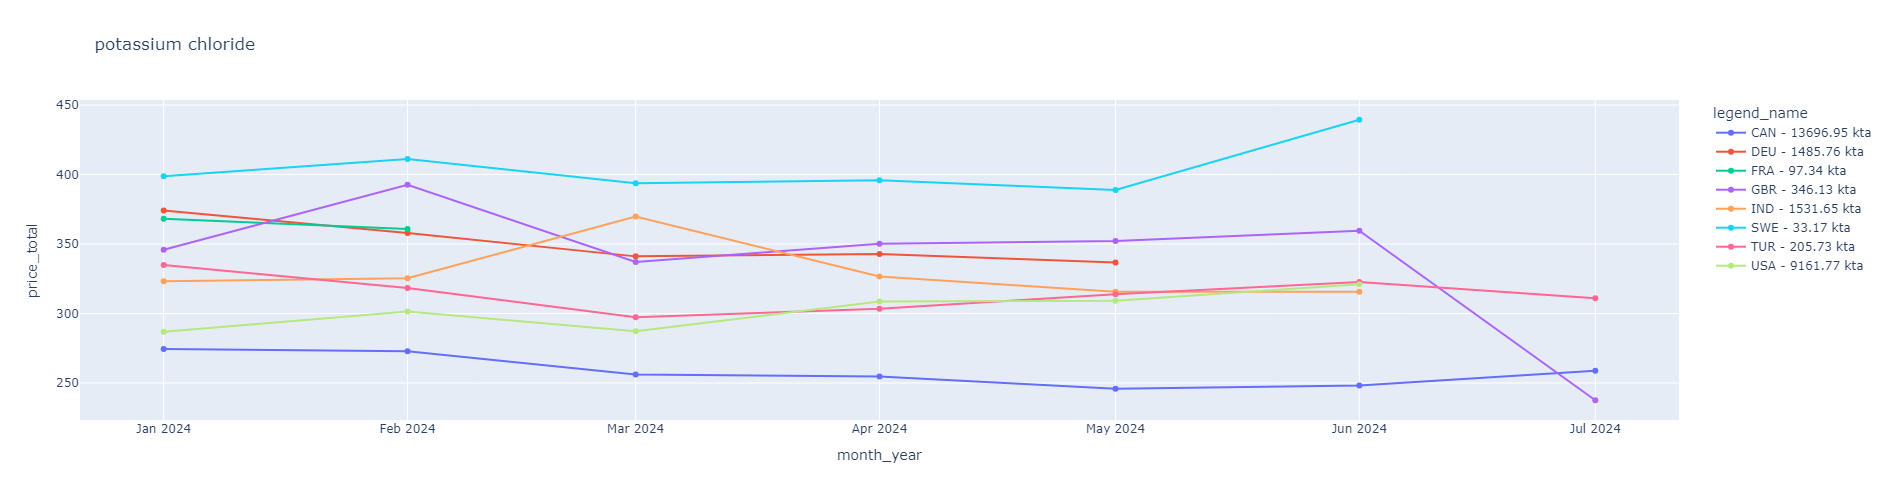

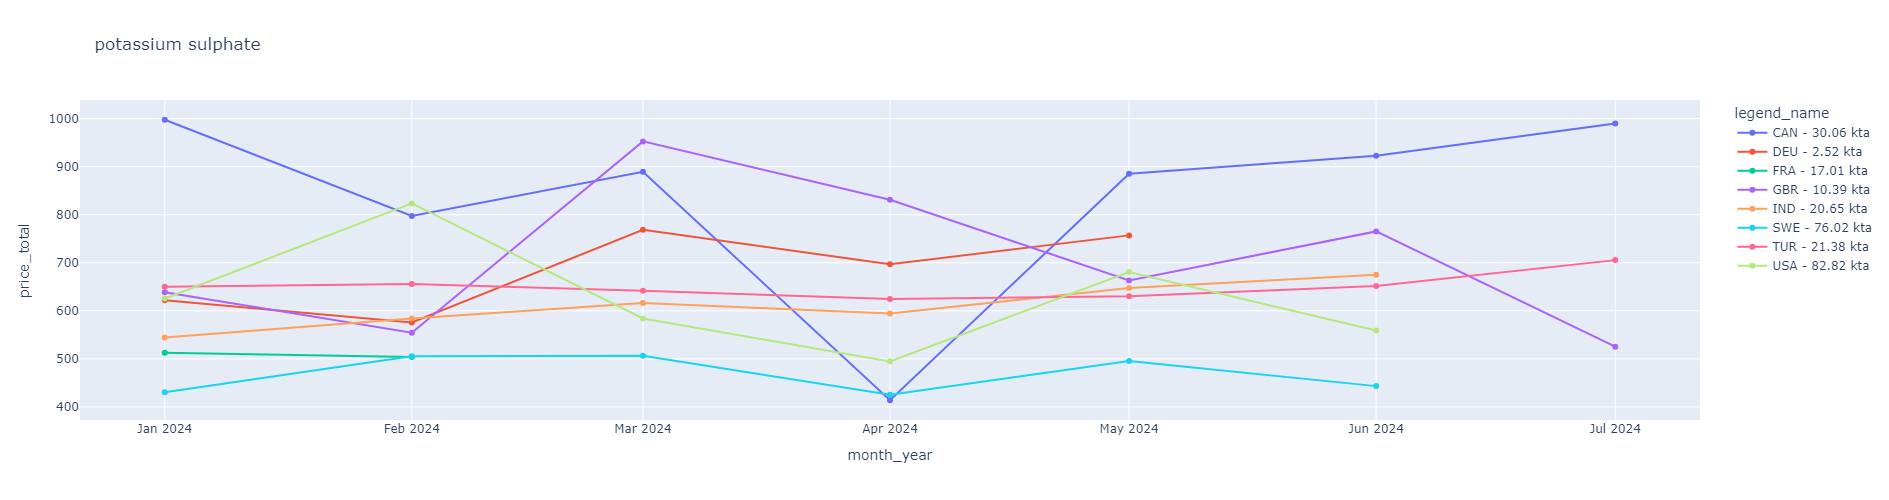

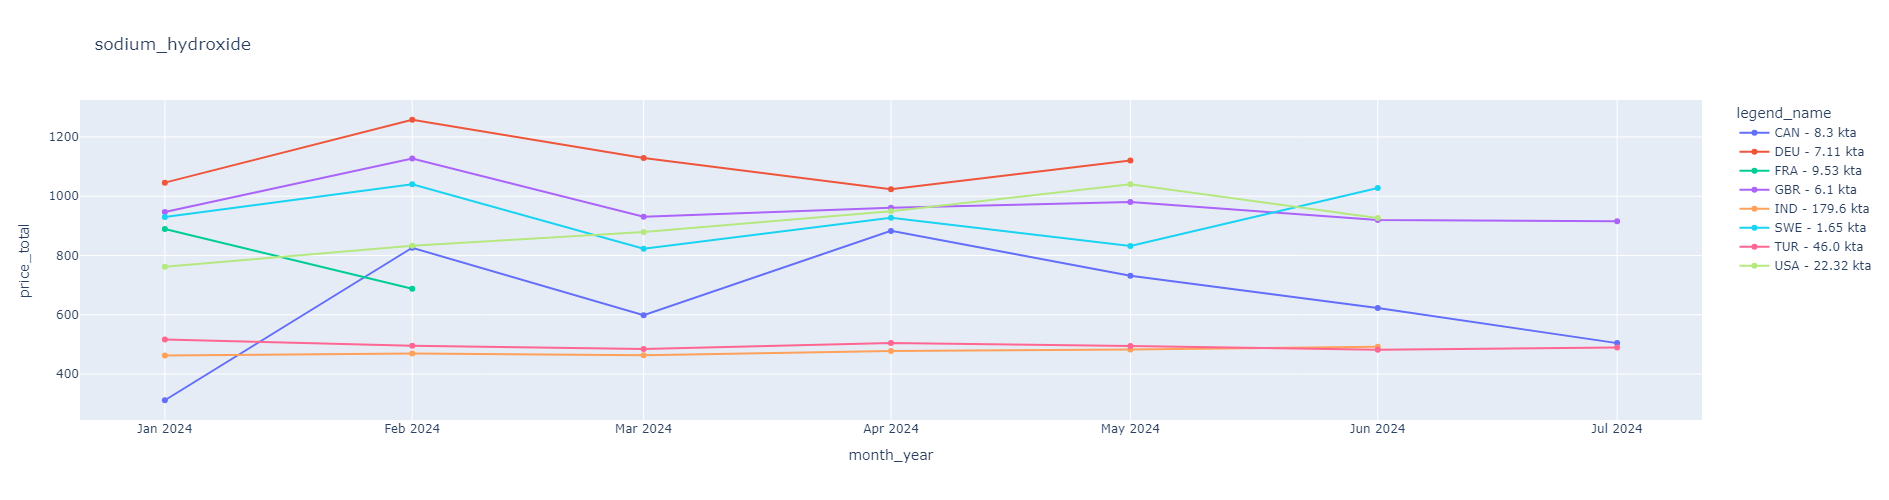

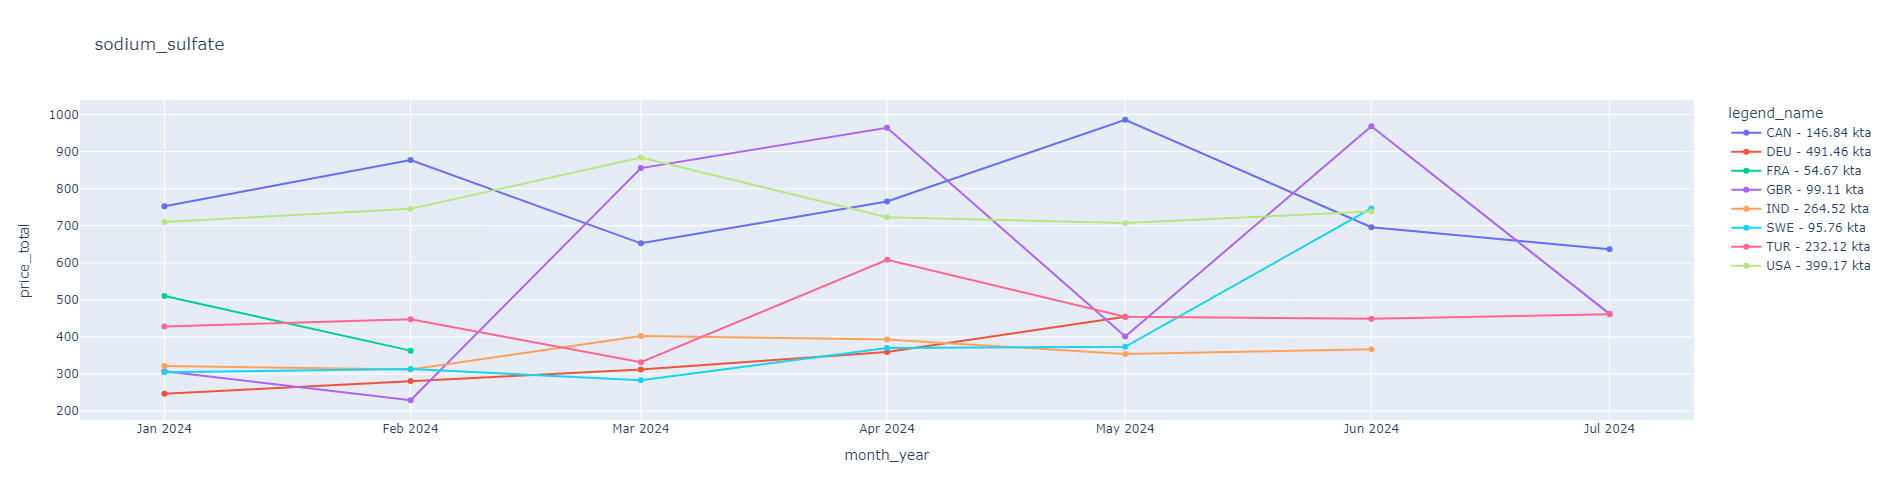

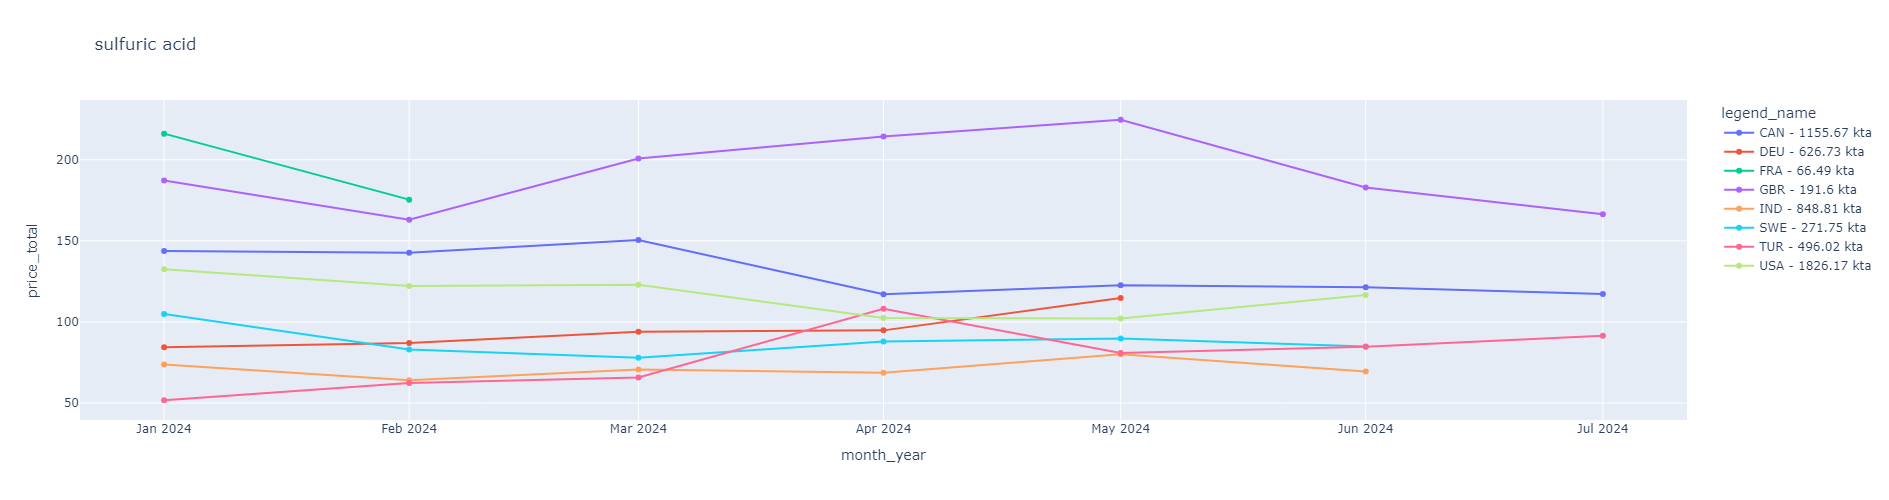

In [79]:
#iso code list
country_code_df = find_country_data.country_codes(filepath='../data/comtrade/iso_country_codes.csv')


#add a month group
df['date'] = pd.to_datetime(df['date'])
# Add month and year columns
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['month_year'] = df['date'].dt.to_period('M')

metrics_df = pd.DataFrame()
for group, group_df in df.groupby(by=['month_year','chemical_name','iso']):
    group_names = ['month_year','chemical_name','iso']
    group_data = {
        name : group[i]
        for i, name in enumerate(group_names)
    }

    _df = group_df.copy()
    #remove non country trade partners
    _df = remove_unkown_partners(_df, country_code_df)
    
    _df = get_metrics_df(_df, group_data)
    metrics_df = pd.concat([metrics_df, _df])
metrics_df = metrics_df.reset_index(drop=True)    

display(metrics_df)

for chemical_name in metrics_df['chemical_name'].unique():
    plot_df = metrics_df[metrics_df['chemical_name']==chemical_name].copy()
    #prep for plotting
    plot_df['month_year'] = plot_df['month_year'].astype(str)
    #legend column
    annual_country_mass = plot_df.groupby('iso')['mass_total'].sum().reset_index(name='mass_annual')
    plot_df = plot_df.merge(annual_country_mass, on='iso', how='left')# Then, merge this result back to the original DataFrame

    # sum for the year
    plot_df['tonnes'] = plot_df['mass_annual']/1000
    plot_df['tonnes'] = plot_df['tonnes'].round(decimals=2).astype(str)
    plot_df['legend_name'] = plot_df['iso'].astype(str) + " - " + plot_df['tonnes'] + " kta"

    fig = px.line(
        plot_df, 
        x="month_year", y="price_total", 
        color='legend_name',
        markers=True,
        height=500, width=1000,
        title=chemical_name,
        
    )
    fig.update_traces(marker=dict(size=6, symbol='circle'))
    display(fig)

# Full pipeline

TODO: convert to hamilton

In [106]:
## Load data
filepaths = [
    '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2023',
    '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/2024',
]

#raw data
df = pd.DataFrame()
for filepath in filepaths:
    trade_df = load_country_data(filepath)
    df = pd.concat([df,trade_df])

#meta data
country_df = pd.read_csv('/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/country_search.csv')
hs_code_df = pd.read_csv('/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/hs_code_search.csv')
country_code_df = find_country_data.country_codes(filepath='../data/comtrade/iso_country_codes.csv')#iso code list df


## Process raw data
# add country names 
df = pd.merge(
    left=df, right=country_df[['name','iso']],
    left_on=['iso'], right_on=['iso']
)
df = df.rename(columns={'name' : 'country_name'})
# add hs code info
hs_code_df['hs_code'] = hs_code_df['id']
df = pd.merge(
    left=df, right=hs_code_df[['hs_code','chemical_name','text']],
    left_on=['hs_code'], right_on=['hs_code']
)
df = df.rename(columns={'text' : 'hs_code_title'})
#reorder
ordered_columns = [
    'date','chemical_name','iso','kind','partner','usd_per_tonne','mass_tonne'
]
unordered_columns = df.columns.difference(ordered_columns).tolist()
df = df[ordered_columns+unordered_columns].copy()

#- type standardization
# add a month group for plotting
df['date'] = pd.to_datetime(df['date'])
# Add month and year columns
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['month_year'] = df['date'].dt.to_period('M')

## Assemble metrics
metrics_df = pd.DataFrame()
group_names = ['month_year','chemical_name','iso']

for group, group_df in df.groupby(by=group_names):
    group_data = {
        name : group[i]
        for i, name in enumerate(group_names)
    }
    
    _df = group_df.copy()
    #remove non country trade partners
    _df = remove_unkown_partners(_df, country_code_df)
    
    _df = get_metrics_df(_df, group_data)
    metrics_df = pd.concat([metrics_df, _df])
metrics_df = metrics_df.reset_index(drop=True)

# add date info
metrics_df['date'] = pd.to_datetime(metrics_df['month_year'].astype(str), format="%Y-%m")
metrics_df['date'] = pd.to_datetime(metrics_df['month_year'].astype(str), format="%Y-%m")
metrics_df['year'] = metrics_df['date'].dt.year
metrics_df['month'] = metrics_df['date'].dt.month
metrics_df = metrics_df.drop(columns=['date'])

#export
export_filepath = '/home/nicholasgrundl/projects/bizwiz/data/comtrade/20240924_export/metrics.csv'
metrics_df.to_csv(export_filepath, index=False)

/tmp/ipykernel_6986/2243861058.py:16: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.

/tmp/ipykernel_6986/2243861058.py:16: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



## Visualize 

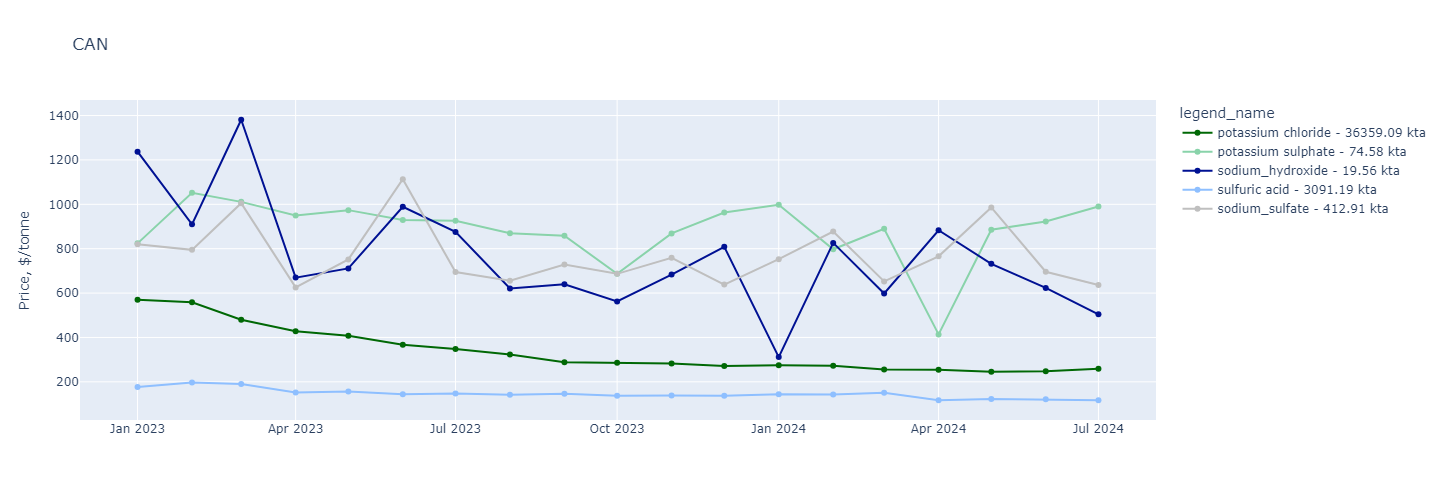

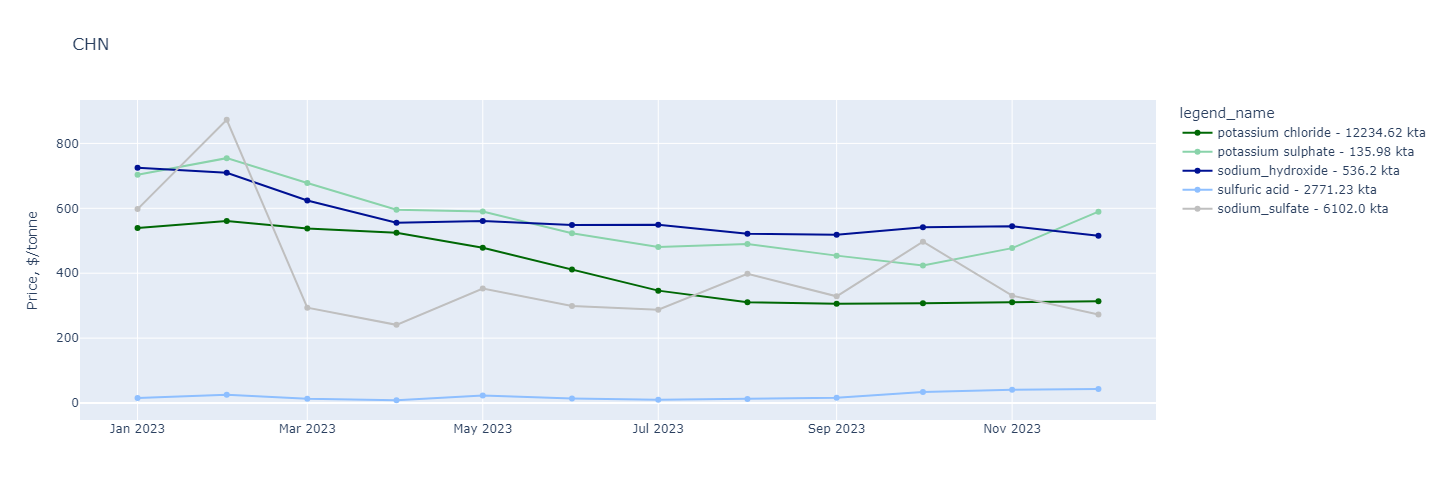

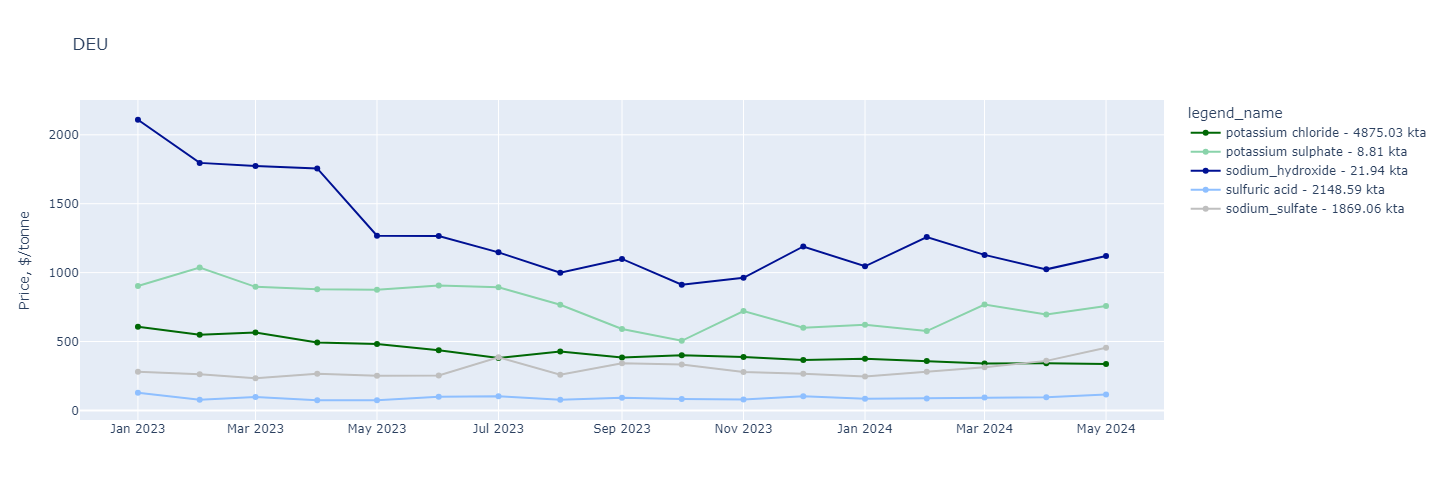

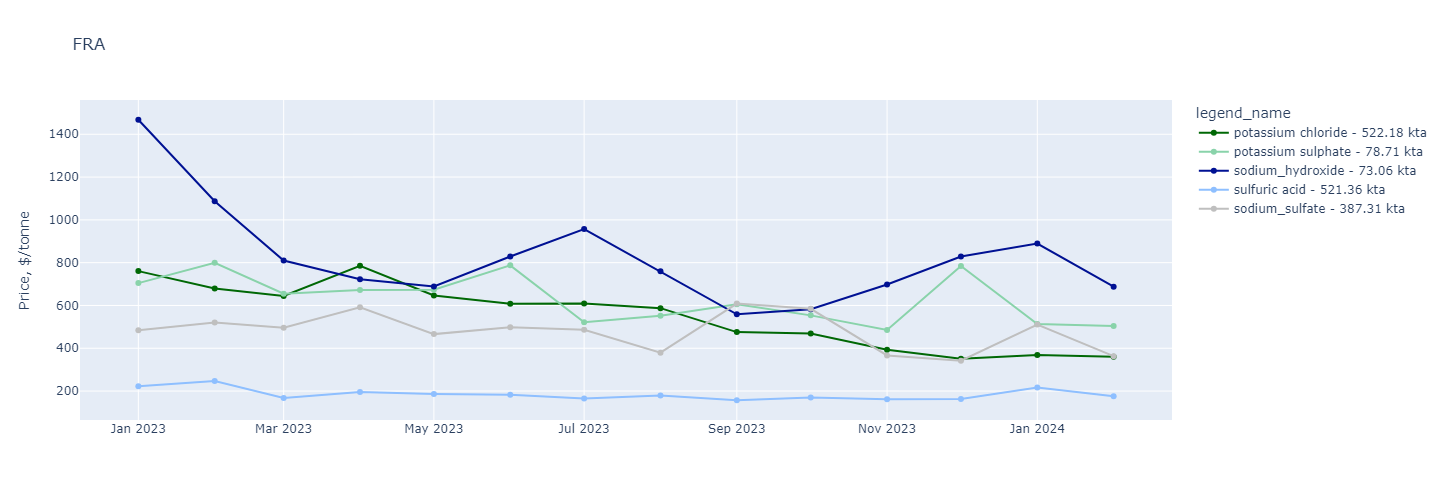

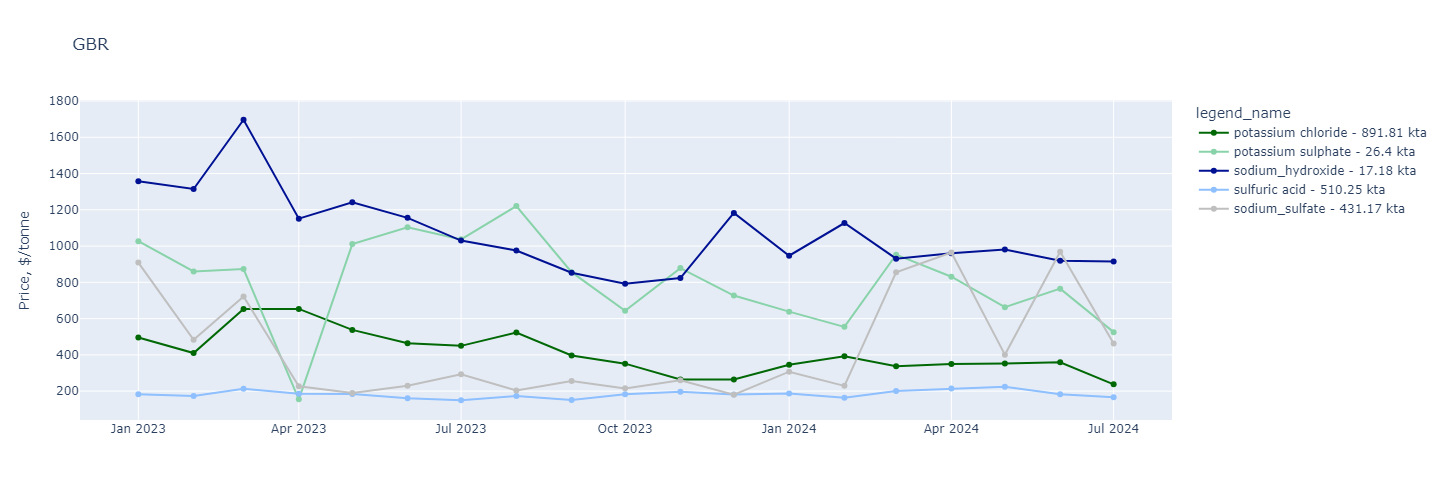

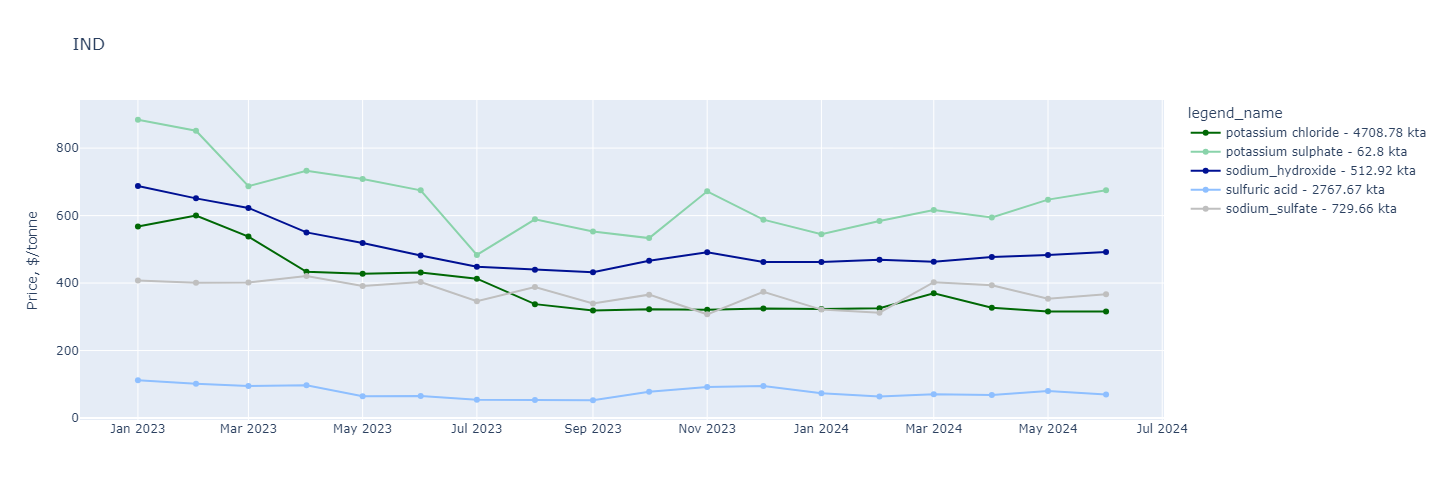

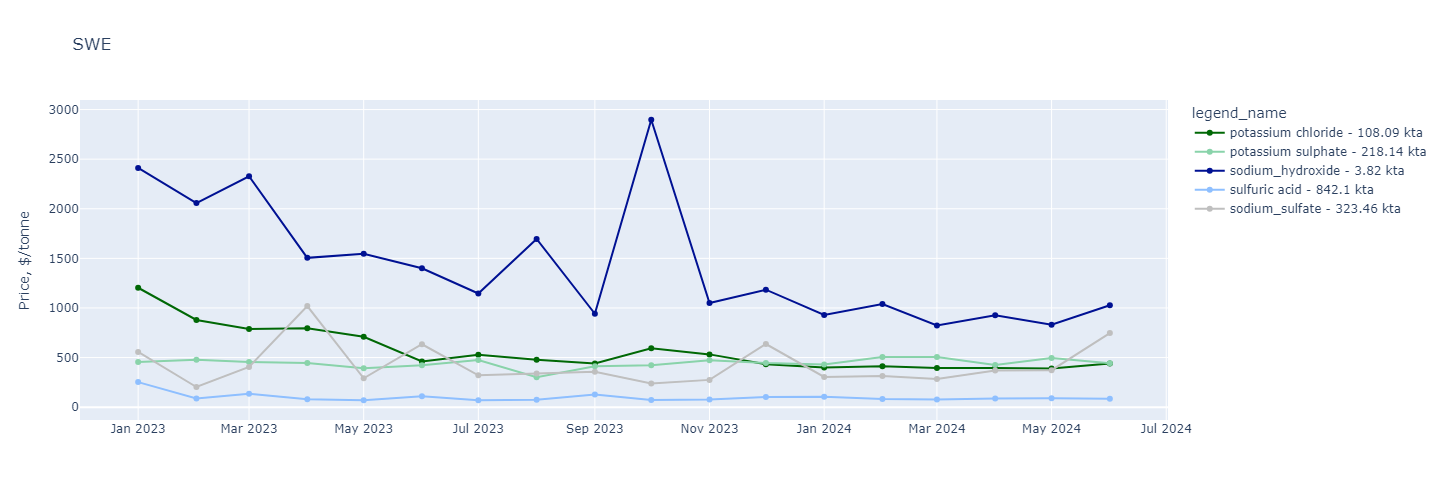

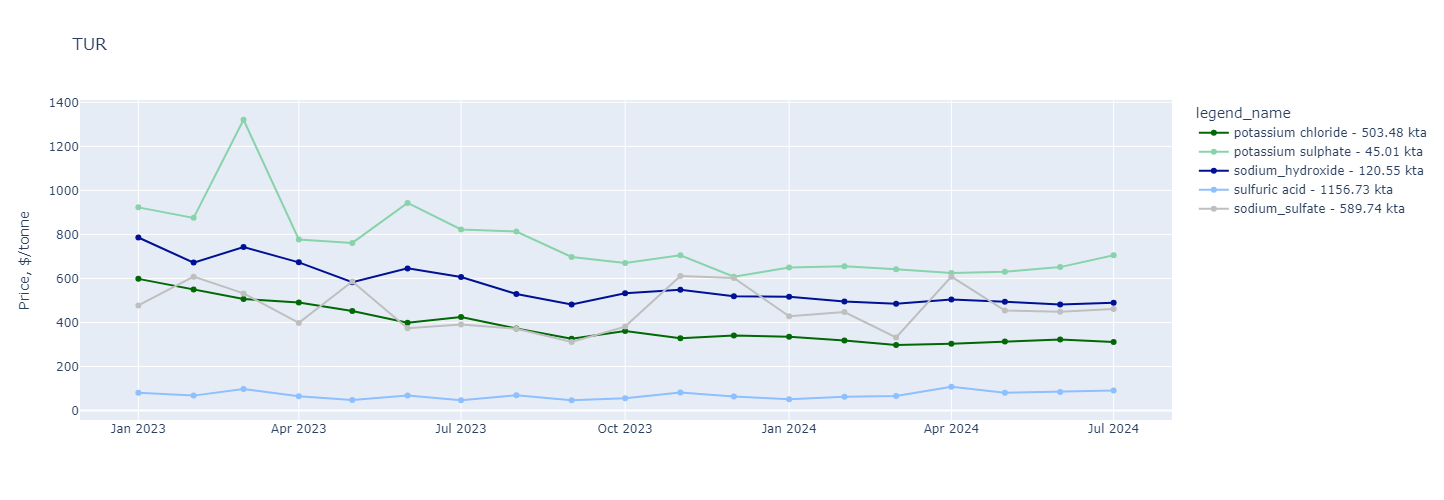

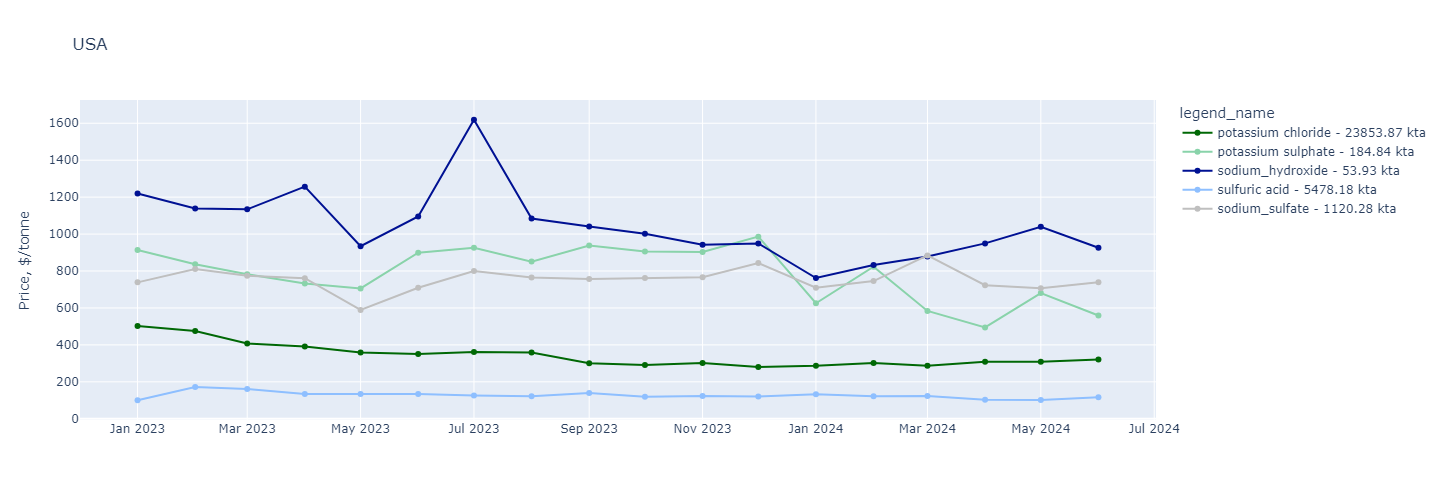

In [108]:
chemical_order = [
    'potassium chloride', 
    'potassium sulphate', 
    'sodium_hydroxide',
    'sulfuric acid',
    'sodium_sulfate', 
]
chemical_colors = {
    'potassium chloride' : '#006805', 
    'potassium sulphate' : '#89d3aa', 
    'sodium_hydroxide' : '#001193',
    'sulfuric acid' : '#8ebfff',
    'sodium_sulfate' : '#bfbfbf', 
}

#explore data by country
for country in metrics_df['iso'].unique():
    plot_df = metrics_df[metrics_df['iso']==country].copy()
    #prep for plotting
    plot_df['month_year'] = plot_df['month_year'].astype(str)
    #legend column
    annual_chemical_mass = plot_df.groupby('chemical_name')['mass_total'].sum().reset_index(name='mass_annual')
    plot_df = plot_df.merge(annual_chemical_mass, on='chemical_name', how='left')# Then, merge this result back to the original DataFrame

    # sum for the year
    plot_df['tonnes'] = plot_df['mass_annual']/1000
    plot_df['tonnes'] = plot_df['tonnes'].round(decimals=2).astype(str)
    plot_df['legend_name'] = plot_df['chemical_name'].astype(str) + " - " + plot_df['tonnes'] + " kta"
    #update colormap and legend order
    legend_colors = {
        plot_df.loc[plot_df['chemical_name'] == chemical_name, 'legend_name'].iloc[0] : color_code
        for chemical_name, color_code in chemical_colors.items()
    }
    legend_order = [
        plot_df.loc[plot_df['chemical_name'] == chemical_name, 'legend_name'].iloc[0]
        for chemical_name in chemical_order
    ]
        
    fig = px.line(
        plot_df, 
        x="month_year", y="price_total", 
        color='legend_name',
        category_orders={'legend_name': legend_order},
        color_discrete_map=legend_colors,
        markers=True,
        height=500, width=1000,
        title=country,
        labels= {
            'month_year' : '',
            'price_total' : 'Price, $/tonne',
        },
    )
    fig.update_traces(marker=dict(size=6, symbol='circle'))
    display(fig)

## Visualize - by chemical

In [ ]:
#explore data
for chemical_name in metrics_df['chemical_name'].unique():
    plot_df = metrics_df[metrics_df['chemical_name']==chemical_name].copy()
    #prep for plotting
    plot_df['month_year'] = plot_df['month_year'].astype(str)
    #legend column
    annual_country_mass = plot_df.groupby('iso')['mass_total'].sum().reset_index(name='mass_annual')
    plot_df = plot_df.merge(annual_country_mass, on='iso', how='left')# Then, merge this result back to the original DataFrame

    # sum for the year
    plot_df['tonnes'] = plot_df['mass_annual']/1000
    plot_df['tonnes'] = plot_df['tonnes'].round(decimals=2).astype(str)
    plot_df['legend_name'] = plot_df['iso'].astype(str) + " - " + plot_df['tonnes'] + " kta"

    fig = px.line(
        plot_df, 
        x="month_year", y="price_total", 
        color='legend_name',
        markers=True,
        height=500, width=1000,
        title=chemical_name,
        
    )
    fig.update_traces(marker=dict(size=6, symbol='circle'))
    display(fig)

# TODO

In [61]:
# load data then process

# 1. load filepath
# - print years
# - print countries in year
# - print hscodes in countries in years

# 2. load dataset
# - load all combined datasets
# - load country search
# - load hs code search

# 3. clean up and standardize
# - keep computed columns-> import/export totals, price, iso, partner, period, date?
# - merge in hscode chemical name, hscode name?
# - drop nas 
# - remove aggregate grouips (world partner)
# - filter based on minimum size of trade? (optional)
# - standardize types
# - plot distribution of price by partner (pair plot partner vs country)

# 4. filter dataset for averaging
# - choose time window
# - filter to time windows

# 5. metrics df
# - compute metrics for each country hscode pair
# - compile in a data frame


# Develop DAG

In [10]:
year = 2024
country_code = 'SWE'

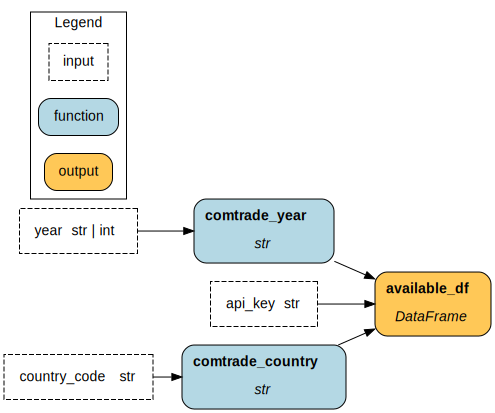

['available_df']

,datasetCode,typeCode,freqCode,period,reporterCode,reporterISO,reporterDesc,classificationCode,classificationSearchCode,isOriginalClassification,...,isExtendedPartnerCode,isExtendedPartner2Code,isExtendedCmdCode,isExtendedCustomsCode,isExtendedMotCode,totalRecords,datasetChecksum,firstReleased,lastReleased,date
320,30020202401202100,C,M,202401,20,AND,Andorra,H6,HS,True,...,True,False,True,False,False,17371,-1608171765,2024-02-26T21:33:28.6,2024-02-26T21:33:28.6,2024-01-01
585,30028202401082100,C,M,202401,28,ATG,Antigua and Barbuda,H3,HS,True,...,True,False,True,True,True,68232,601432407,2024-04-19T20:39:14.7266667,2024-04-19T20:39:14.7266667,2024-01-01
717,30031202401202100,C,M,202401,31,AZE,Azerbaijan,H6,HS,True,...,True,True,True,True,True,415600,-1525752171,2024-04-11T23:05:58.4066667,2024-04-11T23:05:58.4066667,2024-01-01
718,30031202402202100,C,M,202402,31,AZE,Azerbaijan,H6,HS,True,...,True,True,True,True,True,450195,126498905,2024-04-11T23:15:04.8633333,2024-04-11T23:15:04.8633333,2024-02-01
719,30031202403202100,C,M,202403,31,AZE,Azerbaijan,H6,HS,True,...,True,True,True,True,True,458723,1615047269,2024-06-03T15:35:53.3633333,2024-06-03T15:35:53.3633333,2024-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23622,30842202405202100,C,M,202405,842,USA,USA,H6,HS,True,...,True,False,True,False,False,604036,1251066722,2024-07-25T12:48:44.8133333,2024-07-25T12:48:44.8133333,2024-05-01
23623,30842202406202100,C,M,202406,842,USA,USA,H6,HS,True,...,True,False,True,False,False,594267,-970124733,2024-08-09T23:14:40.2733333,2024-08-09T23:14:40.2733333,2024-06-01
24032,30860202401202100,C,M,202401,860,UZB,Uzbekistan,H6,HS,True,...,True,False,True,False,False,75424,831173430,2024-05-30T20:51:00.4,2024-05-30T20:51:00.4,2024-01-01
24033,30860202402202100,C,M,202402,860,UZB,Uzbekistan,H6,HS,True,...,True,False,True,False,False,80010,342991739,2024-05-31T13:48:54.3166667,2024-05-31T13:48:54.3166667,2024-02-01


In [12]:
import importlib
from hamilton import driver
from bizwiz.trade.dags import find_available_data
importlib.reload(find_available_data)

api_key = "b1a3f42948df4538a17418bdfdc5574a"

#build graph
dr =  driver.Builder().with_modules(find_available_data).build()

#execute
final_vars = ["available_df",]
inputs = {  
    'country_code' : 'SWE',
    'year' : 2024,
    'api_key' : api_key,
}
overrides =  {}

dag_execute = dr.visualize_execution(
    final_vars=final_vars,
    inputs=inputs,
    overrides=overrides,
)
display(dag_execute)
results = dr.execute(
    final_vars=final_vars,
    inputs=inputs,
    overrides=overrides,
)
display(list(results.keys()))
available_df = results['available_df'].copy()
available_df

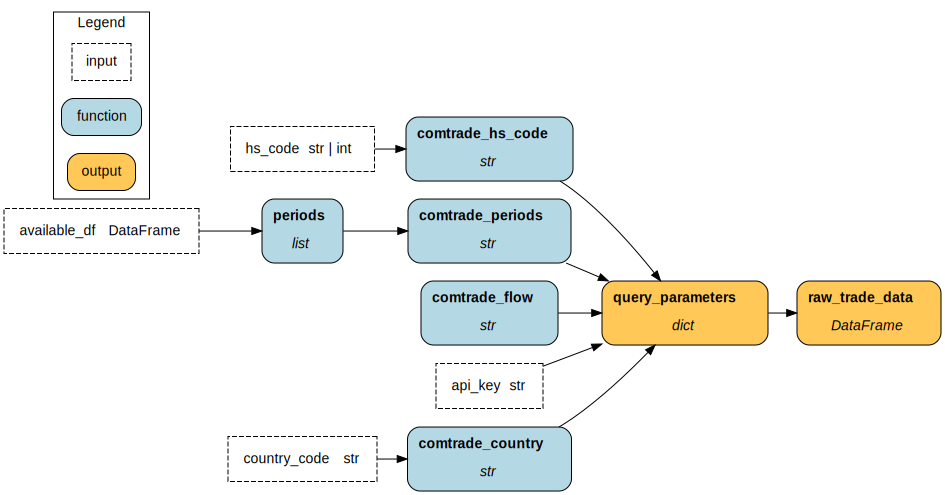

In [24]:
dr.visualize_execution(
        final_vars=["query_parameters","raw_trade_data"],
        inputs=inputs,
        overrides={'kind' : 'export',},
    )

In [26]:
results = dr.execute(
        final_vars=["comtrade_periods","query_parameters","raw_trade_data"],
        inputs=inputs,
        overrides={'kind' : 'export',},
    )
display(results['comtrade_periods'])
display(results['query_parameters'])
display(results['raw_trade_data'])

'202401,202402,202403,202404,202405,202406,202407,202408'

{'subscription_key': 'b1a3f42948df4538a17418bdfdc5574a',
 'typeCode': 'C',
 'freqCode': 'M',
 'clCode': 'HS',
 'period': '202401,202402,202403,202404,202405,202406,202407,202408',
 'reporterCode': '752',
 'cmdCode': '281511',
 'flowCode': 'X',
 'partnerCode': None,
 'partner2Code': None,
 'customsCode': None,
 'motCode': None,
 'maxRecords': None,
 'format_output': 'JSON',
 'breakdownMode': 'classic',
 'includeDesc': True}

""


In [33]:
import comtradeapicall as comtrade
query_parameters = {
    'subscription_key': 'b1a3f42948df4538a17418bdfdc5574a',
 'typeCode': 'C',
 'freqCode': 'M',
 'clCode': 'HS',
 'period': '202401,202402,202403,202404,202405,202406,202407,202408',
 'reporterCode': '752',
 'cmdCode': '281511',
 'flowCode': 'M',
 'partnerCode': None,
 'partner2Code': None,
 'customsCode': None,
 'motCode': None,
 'maxRecords': None,
 'format_output': 'JSON',
 'breakdownMode': 'classic',
 'includeDesc': True
}
df = comtrade.getFinalData(**query_parameters)
df.columns.tolist()

['typeCode',
 'freqCode',
 'refPeriodId',
 'refYear',
 'refMonth',
 'period',
 'reporterCode',
 'reporterISO',
 'reporterDesc',
 'flowCode',
 'flowDesc',
 'partnerCode',
 'partnerISO',
 'partnerDesc',
 'partner2Code',
 'partner2ISO',
 'partner2Desc',
 'classificationCode',
 'classificationSearchCode',
 'isOriginalClassification',
 'cmdCode',
 'cmdDesc',
 'aggrLevel',
 'isLeaf',
 'customsCode',
 'customsDesc',
 'mosCode',
 'motCode',
 'motDesc',
 'qtyUnitCode',
 'qtyUnitAbbr',
 'qty',
 'isQtyEstimated',
 'altQtyUnitCode',
 'altQtyUnitAbbr',
 'altQty',
 'isAltQtyEstimated',
 'netWgt',
 'isNetWgtEstimated',
 'grossWgt',
 'isGrossWgtEstimated',
 'cifvalue',
 'fobvalue',
 'primaryValue',
 'legacyEstimationFlag',
 'isReported',
 'isAggregate']